In [1]:
from utils.setup_grid import setup_grid
import pickle
from definition import ROOT_DIR
from os.path import join
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open(ROOT_DIR+'/Experiments/117/DP/Traj_set_.p', 'rb') as fp:
    traj_list = pickle.load(fp)

In [3]:
g, xs, ys, X, Y, Vx_rzns, Vy_rzns, num_rzns, paths, params, param_str = setup_grid(num_actions=16)

Grid Setup Complete !


In [74]:
def pretty_plot_exact_trajectory_set(g, traj_list, X, Y, vStream_x, vStream_y, fpath, fname='pretty_traj_set'):
    msize = 15
    fsize = 3
    
    # time calculation and state trajectory
    fig = plt.figure(figsize=(fsize, fsize))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlim(0,100)
    ax.set_ylim(0,100)
    # set grid

    minor_ticks = [i for i in range(101) if i%20!=0]
    major_ticks = [i for i in range(0,120,20)]

    ax.set_xticks(minor_ticks, minor=True)
    ax.set_xticks(major_ticks, minor=False)
    ax.set_yticks(major_ticks, minor=False)
    ax.set_yticks(minor_ticks, minor=True)
    
    ax.grid(b= True, which='both', color='#CCCCCC', axis='both',linestyle = '-', alpha = 0.5)
    ax.tick_params(axis='both', which='both', labelsize=6)

    ax.set_xlabel('X (Non-Dim)')
    ax.set_ylabel('Y (Non-Dim)')

    st_point= g.start_state
    plt.scatter(g.xs[st_point[1]], g.ys[g.ni - 1 - st_point[0]], marker = 'o', s = msize, color = 'k', zorder = 1e5)
    plt.scatter(g.xs[g.endpos[1]], g.ys[g.ni - 1 - g.endpos[0]], marker = '*', s = msize*2, color ='k', zorder = 1e5)
    plt.gca().set_aspect('equal', adjustable='box')

    for xtr, ytr in traj_list:
        plt.plot(xtr,ytr)

    plt.savefig(fname,bbox_inches = "tight", dpi =300)
    plt.show()
    return fig

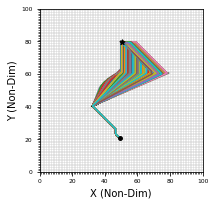

In [75]:
fig = pretty_plot_exact_trajectory_set(g, traj_list, X, Y, Vx_rzns, Vy_rzns, ROOT_DIR+'/Experiments/117/DP/', fname='pretty_traj_set')

In [55]:
minor_ticks = [i for i in range(101) if i%20!=0]
major_ticks = [i for i in range(0,120,20)]
major_ticks

[0, 20, 40, 60, 80, 100]